In [1]:

import pytz
import spacepy.irbempy as ib
import spacepy.time as spt
import spacepy.LANLstar as sl
from spacepy import radbelt as rb
import datetime as dt
import spacepy.time as spt
import spacepy.omni as om
import numpy as np
from pysatdata.loaders.load import *
import datetime
from download_kp import down_kp
import pandas as pd
import matplotlib.pyplot as plt
import json
from scipy import interpolate as interp
# import numba
# from numba import jit

/home/jose/python_projects/lastClosedDS_LANLstar/.venv/lib/python3.10/site-packages/spacepy/omni.py:418: UserWarning: Qin-Denton/OMNI2 data not found in current format. This module has limited functionality. Run spacepy.toolbox.update(QDomni=True) to download data.
  warnings.warn(


In [5]:
stringInstant = '2014-04-07'

# stringInstant = dataT.index[0].split(" ")[0]
instDate = datetime.datetime.strptime(stringInstant, '%Y-%m-%d')


inidate = instDate - datetime.timedelta(days = 1)
enddate = instDate + datetime.timedelta(days = 1)
trange0 = [inidate.strftime('%Y-%m-%d'), enddate.strftime('%Y-%m-%d')]
trange= [(inidate - datetime.timedelta(days = 1)).strftime('%Y-%m-%d'),
         (enddate + datetime.timedelta(days = 1)).strftime('%Y-%m-%d')]

config_file_sat = '/home/jose/python_projects/pySatData/pysatdata/resources/config_file.json'

lshellOrlStar = 'L-Star'
probe = 'a'

In [6]:
pytplot.del_data()
varss_aceSwe = load_sat(trange=trange, satellite='omni',
                    probe=['omni'], rel='rel03',
                    instrument='omni_cdaweb',datatype='hro_1min',
                    config_file=config_file_sat, downloadonly=False,
                    usePandas=True, usePyTplot=False)

quants_Swe = pytplot.data_quants['proton_density']
time_swe = quants_Swe.coords['time'].values
time_dt_swe = [datetime.datetime.fromtimestamp(i, pytz.timezone("UTC")) for i in time_swe]
nP = pytplot.data_quants['proton_density'].values
bgse_x = pytplot.data_quants['BX_GSE'].values
bgse_y = pytplot.data_quants['BY_GSE'].values
bgse_z = pytplot.data_quants['BZ_GSE'].values
b_total = pytplot.data_quants['F'].values
flow_speed = pytplot.data_quants['flow_speed'].values
imf = pytplot.data_quants['IMF'].values
ae_index = pytplot.data_quants['AE_INDEX'].values
symH_index = pytplot.data_quants['SYM_H'].values


varss_aceSwe.index = pd.to_datetime(time_dt_swe)


2022-03-03 20:18:51.628 | INFO     | pysatdata.loaders.load:load_sat:49 - Local Download Path: /home/jose/sat_data/omni
2022-03-03 20:18:51.634 | WARNING  | pysatdata.loaders.load:load_sat:54 - Selecting the sub path key
2022-03-03 20:18:51.639 | INFO     | pysatdata.utils.library_functions:testRemoteDir:233 - Testing Connection
2022-03-03 20:18:52.361 | WARNING  | pysatdata.utils.library_functions:testRemoteDir:239 - Using https://spdf.gsfc.nasa.gov/pub/data/omni/...
2022-03-03 20:18:52.367 | INFO     | pysatdata.loaders.load:load_sat:58 - Remotepath: https://spdf.gsfc.nasa.gov/pub/data/omni/
2022-03-03 20:18:52.375 | INFO     | pysatdata.loaders.load:load_sat:69 - Remote_file_path: omni_cdaweb/hro_1min/%Y/omni_hro_1min_%Y%m01_v*.cdf
2022-03-03 20:18:52.507 | INFO     | pysatdata.utils.download:download:213 - Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/2014/
2022-03-03 20:18:53.300 | INFO     | pysatdata.utils.download:download_file:89 - Dow

In [7]:
doys = [x.strftime('%j') for x in varss_aceSwe.index]
housr = [((x.hour * 60) + x.minute) / 60 for x in  varss_aceSwe.index]
varss_aceSwe['DOY'] = doys
varss_aceSwe['HRS'] = housr

In [8]:
pytplot.del_data()
varss_rept = load_sat(trange=trange, satellite='rbsp',
                    probe=[probe], level='3', 
                    rel='rel03', instrument='rept',
                    datatype='sectors',varnames=['FEDU', 'L_star', 'L'],
                    config_file=config_file_sat, downloadonly=False, 
                    usePandas=False, usePyTplot=True)
quants_fedu_rept = pytplot.data_quants['FEDU']
l_star = pytplot.data_quants['L_star'].values
l_m = pytplot.data_quants['L'].values

2022-03-03 20:21:20.709 | INFO     | pysatdata.loaders.load:load_sat:49 - Local Download Path: /home/jose/sat_data/rbsp
2022-03-03 20:21:20.711 | WARNING  | pysatdata.loaders.load:load_sat:54 - Selecting the sub path key
2022-03-03 20:21:20.714 | INFO     | pysatdata.utils.library_functions:testRemoteDir:233 - Testing Connection
2022-03-03 20:21:21.754 | WARNING  | pysatdata.utils.library_functions:testRemoteDir:239 - Using https://spdf.gsfc.nasa.gov/pub/data/rbsp/...
2022-03-03 20:21:21.762 | INFO     | pysatdata.loaders.load:load_sat:58 - Remotepath: https://spdf.gsfc.nasa.gov/pub/data/rbsp/
2022-03-03 20:21:21.770 | INFO     | pysatdata.loaders.load:load_sat:69 - Remote_file_path: rbspa/l3/ect/rept/sectors/rel03/%Y/rbspa_rel03_ect-rept-sci-l3_%Y%m%d_v*.cdf
2022-03-03 20:21:21.779 | INFO     | pysatdata.utils.download:download:213 - Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/rbsp/rbspa/l3/ect/rept/sectors/rel03/2014/
2022-03-03 20:21:23.006 | INFO     | pysatdata.u

In [9]:
time_rept = quants_fedu_rept.coords['time'].values
time_dt_rept = [datetime.datetime.fromtimestamp(i, pytz.timezone("UTC")) for i in time_rept]
df_rept = pd.DataFrame(l_star, index=time_dt_rept, columns=['L-Star'])

In [10]:
kpDf = down_kp(datetime.datetime.strptime(trange[0], '%Y-%m-%d'), datetime.datetime.strptime(trange[1], '%Y-%m-%d'),
                 dataPath='./data_KP/', downloadData=1)
fls = interp.interp1d((np.arange(0, len(kpDf['Kp'].values))), kpDf['Kp'].values, bounds_error=False)
lsnewy = np.linspace(0, len(kpDf['Kp'].values), len(varss_aceSwe.index))
kp_intep = fls(lsnewy)
varss_aceSwe['Kp'] = kp_intep

Kp_ap_2014.txt
Kp_ap_2014.txt already at: ./data_KP/


In [11]:
varss_aceSwe.columns

Index(['IMF', 'PLS', 'IMF_PTS', 'PLS_PTS', 'percent_interp', 'Timeshift',
       'RMS_Timeshift', 'RMS_phase', 'Time_btwn_obs', 'F', 'BX_GSE', 'BY_GSE',
       'BZ_GSE', 'BY_GSM', 'BZ_GSM', 'RMS_SD_B', 'RMS_SD_fld_vec',
       'flow_speed', 'Vx', 'Vy', 'Vz', 'proton_density', 'T', 'Pressure', 'E',
       'Beta', 'Mach_num', 'Mgs_mach_num', 'x', 'y', 'z', 'BSN_x', 'BSN_y',
       'BSN_z', 'AE_INDEX', 'AL_INDEX', 'AU_INDEX', 'SYM_D', 'SYM_H', 'ASY_D',
       'ASY_H', 'PC_N_INDEX', 'DOY', 'HRS', 'Kp'],
      dtype='object')

In [30]:
import asyncio
import time
def background(f):
    def wrapped(*args, **kwargs):
        return asyncio.get_event_loop().run_in_executor(None, f, *args, **kwargs)

    return wrapped

# @background
def calcLNAN(i):
    Bmodels = ['OPDYN','OPQUIET','T01QUIET','T01STORM','T89','T96','T05']
    # for i in range(varss_aceSwe.shape[0]):
    dat = {
                'Kp'     : np.array([varss_aceSwe.iloc[i]['Kp']]),
                'Dst'    : np.array([varss_aceSwe.iloc[i]['SYM_H']]),
                'dens'   : np.array([varss_aceSwe.iloc[i]['proton_density']]),
                'velo'   : np.array([varss_aceSwe.iloc[i]['flow_speed']]),
                'Pdyn'   : np.array([varss_aceSwe.iloc[i]['Pressure']]),
                'ByIMF'  : np.array([varss_aceSwe.iloc[i]['BY_GSM']]),
                'BzIMF'  : np.array([varss_aceSwe.iloc[i]['BZ_GSM']]),
                'G1'     : np.array([1.02966]),
                'G2'     : np.array([0.54933]),
                'G3'     : np.array([0.81399]),
                'W1'     : np.array([0.12244]),
                'W2'     : np.array([0.2514 ]),
                'W3'     : np.array([0.0892 ]),
                'W4'     : np.array([0.0478 ]),
                'W5'     : np.array([0.2258 ]),
                'W6'     : np.array([1.0461 ]),
                'Year'   : np.array([varss_aceSwe.index[i].year]),
                'DOY'    : np.array([varss_aceSwe.iloc[i]['DOY']]),
                'Hr'     : np.array([varss_aceSwe.iloc[i]['HRS']]),
                'PA'     : np.array([87.3875])}
        
    return sl.LANLmax(dat, Bmodels)

In [31]:
outs = []
for i in range(varss_aceSwe.shape[0]):
    outs.append(calcLNAN(i))

In [32]:
outs[2]

{'OPDYN': array([nan]),
 'OPQUIET': array([nan]),
 'T01QUIET': array([nan]),
 'T01STORM': array([nan]),
 'T89': array([nan]),
 'T96': array([nan]),
 'T05': array([nan])}

In [33]:
df = pd.DataFrame(outs)

In [28]:

async def calcLNAN():
    Bmodels = ['OPDYN','OPQUIET','T01QUIET','T01STORM','T89','T96','T05']
    # for i in range(varss_aceSwe.shape[0]):
    outs = []
    for i in range(varss_aceSwe.shape[0]):
        dat = {
                    'Kp'     : np.array([varss_aceSwe.iloc[i]['Kp']]),
                    'Dst'    : np.array([varss_aceSwe.iloc[i]['SYM_H']]),
                    'dens'   : np.array([varss_aceSwe.iloc[i]['proton_density']]),
                    'velo'   : np.array([varss_aceSwe.iloc[i]['flow_speed']]),
                    'Pdyn'   : np.array([varss_aceSwe.iloc[i]['Pressure']]),
                    'ByIMF'  : np.array([varss_aceSwe.iloc[i]['BY_GSM']]),
                    'BzIMF'  : np.array([varss_aceSwe.iloc[i]['BZ_GSM']]),
                    'G1'     : np.array([1.02966]),
                    'G2'     : np.array([0.54933]),
                    'G3'     : np.array([0.81399]),
                    'W1'     : np.array([0.12244]),
                    'W2'     : np.array([0.2514 ]),
                    'W3'     : np.array([0.0892 ]),
                    'W4'     : np.array([0.0478 ]),
                    'W5'     : np.array([0.2258 ]),
                    'W6'     : np.array([1.0461 ]),
                    'Year'   : np.array([varss_aceSwe.index[i].year]),
                    'DOY'    : np.array([varss_aceSwe.iloc[i]['DOY']]),
                    'Hr'     : np.array([varss_aceSwe.iloc[i]['HRS']]),
                    'PA'     : np.array([87.3875])}
        outs.append(sl.LANLmax(dat, Bmodels))
        
    return outs

In [76]:
expected_lmax = {'OPDYN'   : np.array([10.6278]),
                          'OPQUIET' : np.array([9.3352]),
                          'T01QUIET': np.array([10.0538]),
                          'T01STORM': np.array([9.9300]),
                          'T89'     : np.array([8.2888]),
                          'T96'     : np.array([8.2410]),
                          'T05'    : np.array([9.9295])}

In [79]:
actual

{'OPDYN': array([10.62587259]),
 'OPQUIET': array([9.33781189]),
 'T01QUIET': array([10.0300971]),
 'T01STORM': array([9.91675895]),
 'T89': array([7.27245914]),
 'T96': array([9.26556856]),
 'T05': array([9.90567697])}

In [9]:
for key in Bmodels:
    np.testing.assert_almost_equal(expected_lmax[key], actual[key], decimal=4)

NameError: name 'Bmodels' is not defined

In [57]:
spt.Ticktock(df_rept.index)

Ticktock( [Timestamp('2014-03-31 00:00:05.752000+0000', tz='UTC')
 Timestamp('2014-03-31 00:00:16.585000+0000', tz='UTC')
 Timestamp('2014-03-31 00:00:27.417000+0000', tz='UTC') ...
 Timestamp('2014-04-13 23:59:15.501000+0000', tz='UTC')
 Timestamp('2014-04-13 23:59:26.326000+0000', tz='UTC')
 Timestamp('2014-04-13 23:59:37.151000+0000', tz='UTC')], dtype=UTC)

In [10]:
LCDS = ib.find_LCDS(spt.Ticktock(df_rept.index[0:1], 'ISO'),alpha=86, extMag='T05')

In [11]:
LCDS

{'LCDS': dmarray([9.16306926]),
 'K': dmarray([6.46376187e-05]),
 'UTC': dmarray([Timestamp('2014-03-31 00:00:05.752000')], dtype=object),
 'AlphaEq': dmarray([86])}

In [2]:
with open(f'/home/jose/python_projects/rbsp_flux_sw_sea/dataJson/CME_enhancement_electronFluxCut_Omni.json', 'r') as f:
	dataFlux = json.load(f)
with open(f'/home/jose/python_projects/rbsp_flux_sw_sea/dataJson/CME_enhancement_CutKp.json', 'r') as f:
	dataFlux_Kp = json.load(f)

In [75]:
dataFlux.keys()

dict_keys(['2012-11-13 03:00:00', '2013-03-17 09:00:00', '2013-05-25 00:00:00', '2013-07-10 03:00:00', '2013-10-02 06:00:00', '2014-02-08 12:00:00', '2014-02-19 09:00:00', '2014-04-12 06:00:00', '2015-03-17 15:00:00', '2015-05-12 09:00:00', '2015-07-11 06:00:00', '2015-11-07 06:00:00'])

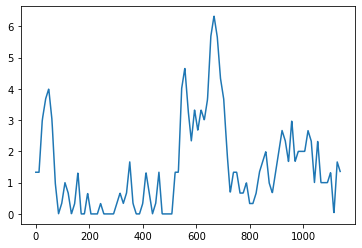

In [55]:
plt.plot(kp_intep)

In [59]:
len(dataFlux['2015-03-17 15:00:00']['data']['SYM_H'])

1151

In [91]:
def calcLNAN3(date, dataOm, dataKp):
    nn = len(dataFlux[date]['data']['SYM_H'])
    Bmodels = ['OPDYN','OPQUIET','T01QUIET','T01STORM','T89','T96','T05']
    # for i in range(varss_aceSwe.shape[0]):
    tt = dataKp[date]['data']['Kp']
    fls = interp.interp1d((np.arange(0, len(tt))), tt, bounds_error=False)
    lsnewy = np.linspace(0, len(tt), nn)
    kp_intep = fls(lsnewy)
    outs = []
    for i in range(nn):
        ddatae = pd.to_datetime(dataOm[date]['time'][i])
        yys = ddatae.year
        doys = ddatae.strftime('%j')
        housr = ((ddatae.hour * 60) + ddatae.minute) / 60 
        dat = {
                    'Kp'     : np.array([kp_intep[i]]),
                    'Dst'    : np.array([dataOm[date]['data']['SYM_H'][i]]),
                    'dens'   : np.array([dataOm[date]['data']['proton_density'][i]]),
                    'velo'   : np.array([dataOm[date]['data']['flow_speed'][i]]),
                    'Pdyn'   : np.array([dataOm[date]['data']['Pressure'][i]]),
                    'ByIMF'  : np.array([dataOm[date]['data']['BY_GSM'][i]]),
                    'BzIMF'  : np.array([dataOm[date]['data']['BZ_GSM'][i]]),
                    'G1'     : np.array([1.02966]),
                    'G2'     : np.array([0.54933]),
                    'G3'     : np.array([0.81399]),
                    'W1'     : np.array([0.12244]),
                    'W2'     : np.array([0.2514 ]),
                    'W3'     : np.array([0.0892 ]),
                    'W4'     : np.array([0.0478 ]),
                    'W5'     : np.array([0.2258 ]),
                    'W6'     : np.array([1.0461 ]),
                    'Year'   : np.array([yys]),
                    'DOY'    : np.array([doys]),
                    'Hr'     : np.array([housr]),
                    'PA'     : np.array([87.3875])}
        
        outs.append(float(sl.LANLmax(dat, Bmodels)['T05'][0]))
            
    return outs

In [92]:
ss = calcLNAN3('2015-03-17 15:00:00', dataFlux, dataFlux_Kp)

In [93]:
ss

[8.746929840116893]

In [77]:
cz = pd.DataFrame(ss)

In [80]:
cz.head()

,OPDYN,OPQUIET,T01QUIET,T01STORM,T89,T96,T05
0,[9.379130612206541],[10.476702021702096],[8.417264978784052],[7.198708443923383],[8.36654942589998],[8.50516842398342],[8.746929840116893]
1,[9.36914932631629],[10.476420756832033],[8.460448173876957],[7.188855419333255],[8.407570822382514],[8.478703936764617],[8.746000090578109]
2,[9.364336893339019],[10.476072067508818],[8.544619056354897],[7.187501355681938],[8.410782910117407],[8.488885266409824],[8.766473388361597]
3,[9.364269175008523],[10.475620866358764],[8.610747921603602],[7.188990235745457],[8.394185110186704],[8.491427937748949],[8.791903699607804]
4,[9.375774064066885],[10.474992349863149],[8.64571200222626],[7.1886430338939675],[8.366343793721772],[8.487249055727581],[8.808527576908823]


In [83]:
cz05 = [float(x[0]) for x in cz['T05']]
cz96 = [float(x[0]) for x in cz['T96']]
cz89 = [float(x[0]) for x in cz['T89']]
czT01STORM = [float(x[0]) for x in cz['T01STORM']]

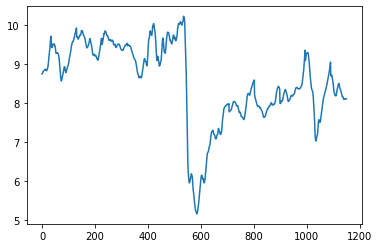

In [85]:
plt.plot(cz05)
# plt.plot(cz96)
# plt.plot(cz89)
# plt.plot(czT01STORM)

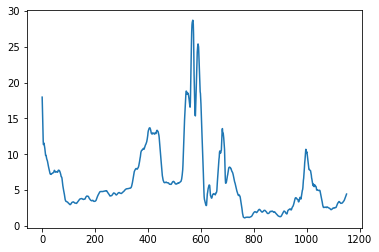

In [74]:
plt.plot(dataFlux['2012-11-13 03:00:00']['data']['proton_density'])

In [53]:
LCDS = ib.find_LCDS(spt.Ticktock(ttime, 'ISO'),alpha=90, extMag='T89')

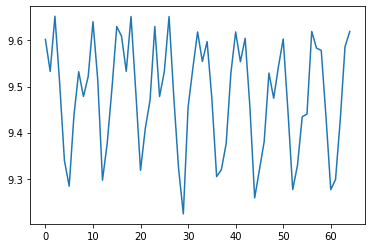

In [55]:
plt.plot(LCDS['LCDS'])

In [35]:
ttime

['2012-10-04 15:00:00.000000',
 '2012-10-04 18:00:00.000000',
 '2012-10-04 21:00:00.000000',
 '2012-10-05 00:00:00.000000',
 '2012-10-05 03:00:00.000000',
 '2012-10-05 06:00:00.000000',
 '2012-10-05 09:00:00.000000',
 '2012-10-05 12:00:00.000000',
 '2012-10-05 15:00:00.000000',
 '2012-10-05 18:00:00.000000',
 '2012-10-05 21:00:00.000000',
 '2012-10-06 00:00:00.000000',
 '2012-10-06 03:00:00.000000',
 '2012-10-06 06:00:00.000000',
 '2012-10-06 09:00:00.000000',
 '2012-10-06 12:00:00.000000',
 '2012-10-06 15:00:00.000000',
 '2012-10-06 18:00:00.000000',
 '2012-10-06 21:00:00.000000',
 '2012-10-07 00:00:00.000000',
 '2012-10-07 03:00:00.000000',
 '2012-10-07 06:00:00.000000',
 '2012-10-07 09:00:00.000000',
 '2012-10-07 12:00:00.000000',
 '2012-10-07 15:00:00.000000',
 '2012-10-07 18:00:00.000000',
 '2012-10-07 21:00:00.000000',
 '2012-10-08 00:00:00.000000',
 '2012-10-08 03:00:00.000000',
 '2012-10-08 06:00:00.000000',
 '2012-10-08 09:00:00.000000',
 '2012-10-08 12:00:00.000000',
 '2012-1